In [1]:
import numpy as np #importa a biblioteca numpy
from sklearn.model_selection import train_test_split #importa biblioteca de testes
from sklearn.tree import DecisionTreeClassifier #importa a arvore de decisão
from sklearn import tree #importa a função tree para plotar a arvore
from sklearn.metrics import accuracy_score #métrica de ácuracia do algoritimo
from sklearn.metrics import confusion_matrix # importa matiz de confusão
import pandas as pd #importa a biblioteca pandas
import matplotlib.pyplot as plt # importa a matplotlib
import seaborn as sns # importa a seaborn

In [3]:
# Criando a base de dados
data = pd.DataFrame({
    'Precisão na Montagem': ['Alta', 'Média', 'Alta', 'Média', 'Baixa', 'Baixa'],
    'Valocidade de Produção': ['Média', 'Baixa', 'Alta', 'Alta', 'Baixa', 'Média'],
    'Taxa de Retrabalho': ['Baixa', 'Alta', 'Baixa', 'Baixa', 'Alto', 'Alto'],
    'Classificação': ['Alta Quaidade', 'Baixa Qualidade', 'Alta Qualidade', 'Alta Qualidade', 'Baixa Qualidade', 'Baixa Qualidade']
})


In [4]:
# Codificando variáveis categóricas
data_encoded = pd.get_dummies(data, drop_first=True)
# Separando variáveis independentes e dependentes
X = data_encoded.drop('Classificação_Alta Qualidade', axis=1)
y = data_encoded['Classificação_Alta Qualidade']



In [5]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Criando e treinando o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
# Fazendo previsões
y_pred = clf.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:")
print(conf_matrix)


Acurácia: 0.5
Matriz de Confusão:
[[1 1]
 [0 0]]


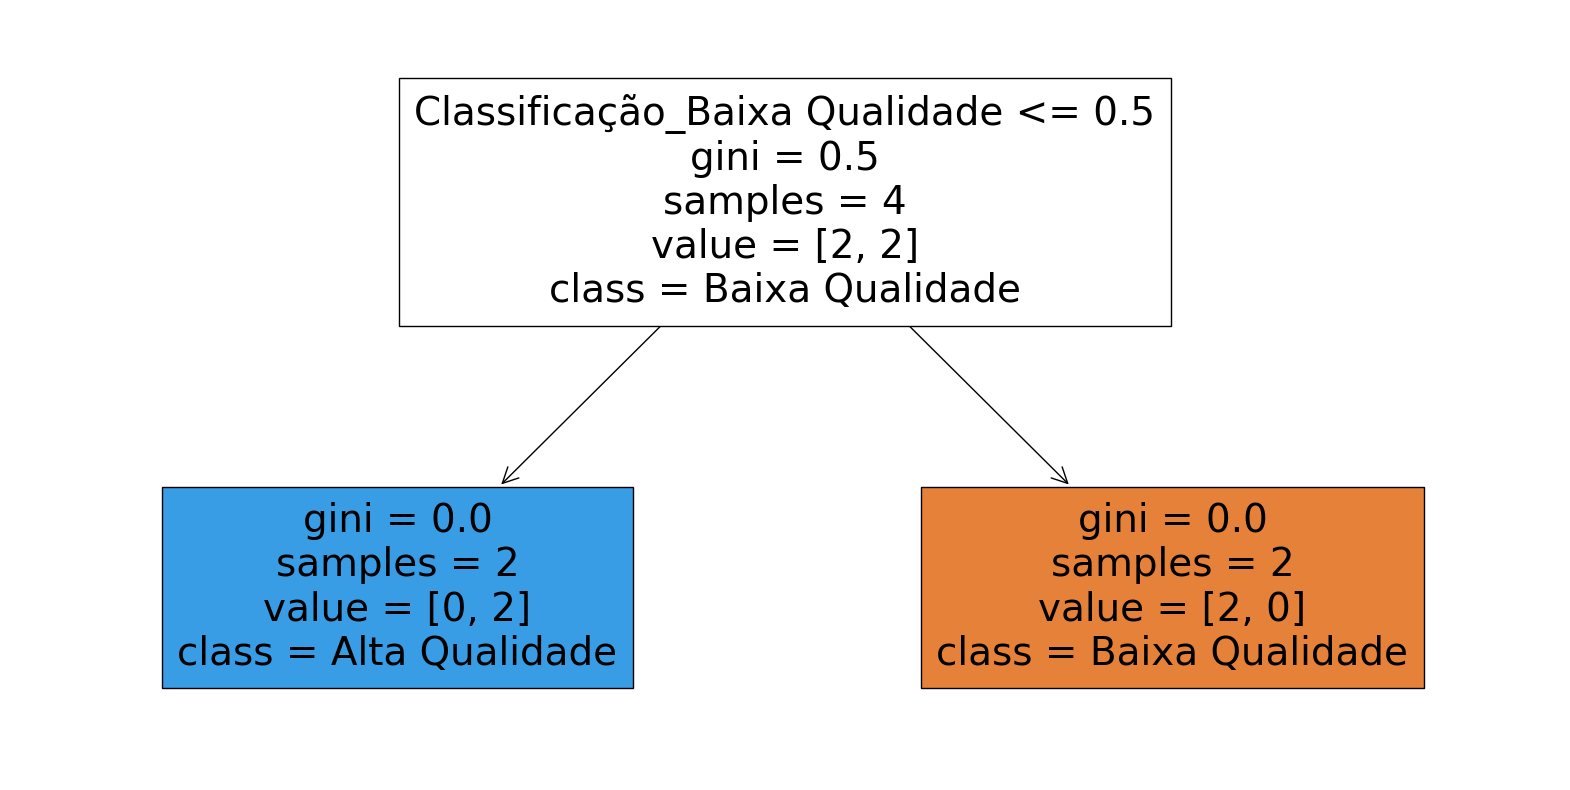

In [9]:

# Converta o Index em uma lista de strings
feature_names = list(X.columns)

# Visualizando a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=feature_names, class_names=['Baixa Qualidade', 'Alta Qualidade'], filled=True)
plt.show()

